# **Customer Purchase Prediction using PCA and MLP**

## **Description**
This project applies **Principal Component Analysis (PCA)** for dimensionality reduction and a **Multilayer Perceptron (MLP)** for predictive modeling. The goal is to analyze customer data, reduce its dimensionality for better interpretability, and build an MLP model to predict purchasing behavior effectively.

---

## **Dataset**
The dataset used for this project is the **"Customer Personality Analysis"** dataset from Kaggle. It includes demographic and behavioral information about customers, aiming to analyze and predict their purchasing patterns.  
[**Dataset link: Customer Personality Analysis on Kaggle**](https://www.kaggle.com/imakash3011/customer-personality-analysis)

---

## **Project Workflow**

### **1. Data Exploration and Preprocessing**
- Loaded and explored the dataset to understand its structure and identify key features.
- Features included demographic data like:
  - **Age**
  - **Income**
  - **Marital status**
- Behavioral details like spending on various product categories were analyzed.
- Addressed **missing values** and normalized the data to prepare it for PCA and MLP modeling.

---

### **2. Dimensionality Reduction with PCA**
- Performed **Principal Component Analysis (PCA)** to reduce the dimensionality of the dataset.
- Selected the number of components that captured **at least 90% of the explained variance**.
- Transformed the data into a **new feature space** defined by the principal components, which helped visualize and better interpret the relationships among customers.

---

### **3. Predictive Modeling with Multilayer Perceptron (MLP)**
- Built a **Multilayer Perceptron (MLP)** to predict customers' likelihood of making purchases in specific product categories.
- **Dataset split**:
  - Divided into training and testing subsets to evaluate model performance accurately.
- **MLP Architecture**:
  - Number of hidden layers and neurons per layer.
  - Activation functions.
  - Optimizer and learning rate.

---

### **4. Model Evaluation**
- Evaluated the MLP model using classification metrics:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-score**
  - **Confusion matrix**
- Compared these metrics between the training and testing datasets to check for **overfitting** or **underfitting**.
- Visualized **learning curves** to analyze loss and accuracy trends during training.

---

### **5. Discussion and Insights**
#### **Insights from PCA:**
- Identified significant patterns and groupings among customers in the reduced feature space.
- PCA proved effective for dimensionality reduction while retaining important information.

#### **Model Performance:**
- The MLP model demonstrated **reasonable performance** in predicting customer behavior based on the PCA-transformed data.
- Discussed potential areas for improvement:
  - **Hyperparameter tuning**.
  - Exploring alternative architectures.

---

## **Deliverables**
- A final report including:
  - **Data preprocessing and PCA steps.**
  - **Visualization of PCA-transformed data.**
  - **MLP architecture and results.**
  - **Evaluation metrics** and their interpretation.
  - **Discussion of insights** and recommendations for future work.

---

## **Summary**
This project exemplifies the integration of **PCA for feature reduction** and **MLP for predictive modeling**, showcasing the practical application of machine learning techniques in customer behavior analysis.


# **Data Exploration and Preprocessing**

In [3]:
import pandas as pd

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/marketing_campaign.csv')
print(df.head()) # Checking if the dataset was loaded correctly

  ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0  5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...                                                                                                                                                                                                                                                                                                                                                  
1  2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...                                                                                                                                                                      

In [4]:
# Noticed an issue with loading: the separator is '\t' instead of commas
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/marketing_campaign.csv', sep='\t')
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [5]:
# Checking for missing values in the dataset
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
# Observed 24 missing values in the "Income" column
# Since it's a small proportion of the data, dropping rows with missing values in "Income"
df = df.dropna(subset=['Income'])
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [7]:
# Checking for duplicated rows in the dataset
print(df.duplicated().sum())

0


In [8]:
# No duplicates found
# Reviewing the data types of all columns
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [9]:
# Dropping the "ID" column as it is not relevant for analysis
df = df.drop('ID', axis=1)
# Converting the "Dt_Customer" column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y') # Using the specified format to ensure the date is parsed correctly as per the dataset
# Verifying the updated data types
print(df.dtypes)

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [10]:
# Checking for inconsistent data in the dataset
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [11]:
# Observing that certain values can be grouped or categorized for better clarity.
# For instance, values like "Absurd" and "YOLO" don't seem valid.
# Interpreting "Alone" as "Single" and treating "Absurd" and "YOLO" as unknown categories.
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'], 'Unknown')
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'], 'Single')
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Unknown']


In [12]:
print(df['Z_CostContact'].unique())

[3]


In [13]:
print(df['Z_Revenue'].unique())

[11]


In [14]:
# Since both columns "Z_CostContact" and "Z_Revenue" have only one unique value, they are not useful for analysis. Dropping them.
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0    

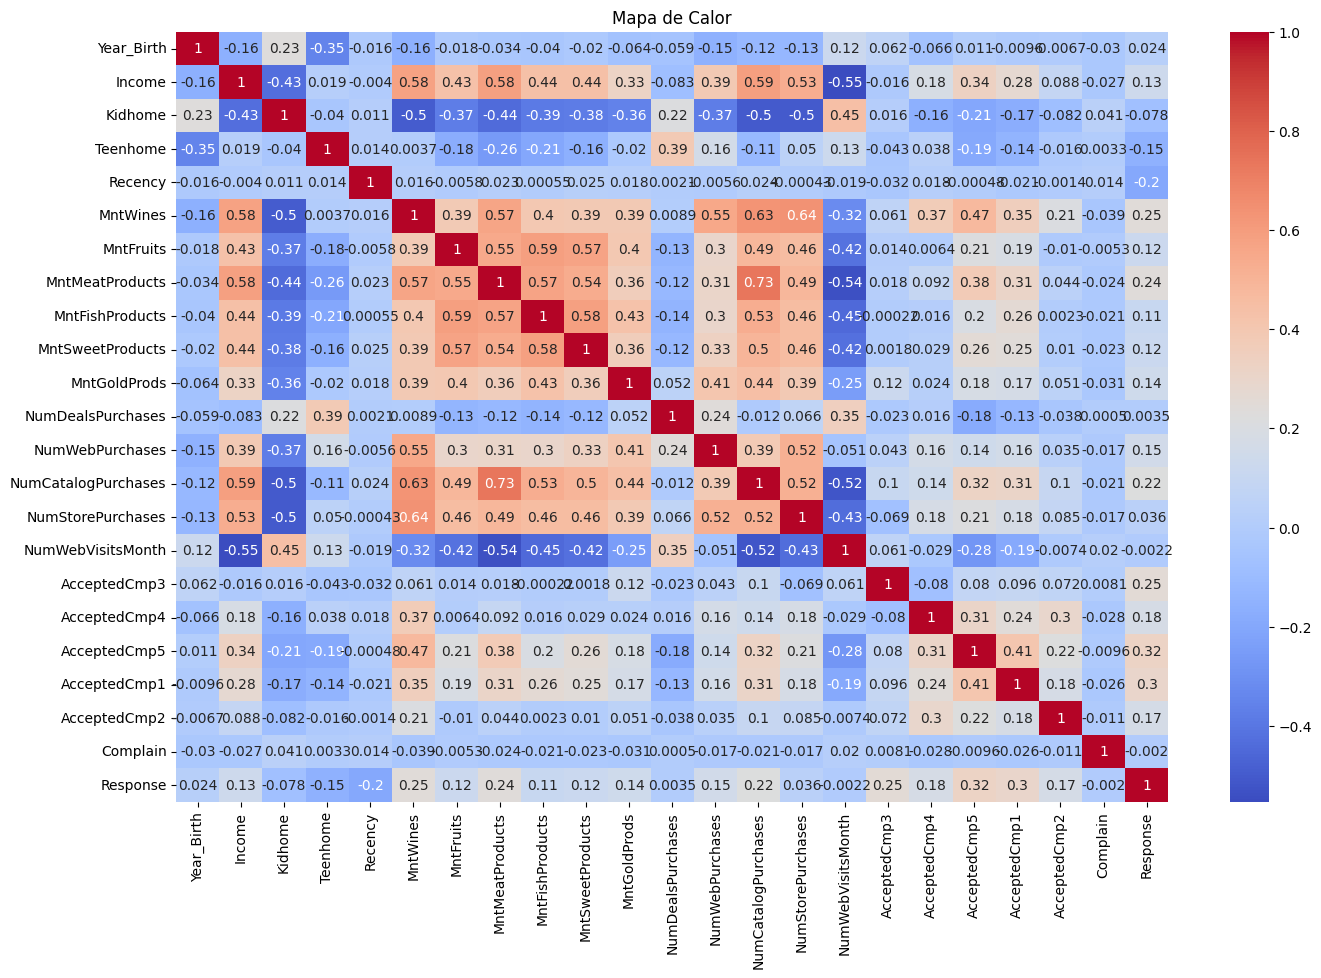

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Mapa de Calor')
plt.show()

In [16]:
# Key observations from the heatmap:
# - High positive correlations:
#   - "MntWines" and "MntMeatProducts" have a correlation of 0.63,
#     indicating that customers who spend more on wines are also likely to spend more on meat products.
#   - "NumCatalogPurchases" and "NumWebPurchases" show a correlation of 0.73,
#     suggesting that customers who make catalog purchases also tend to make web purchases.
# - High negative correlation:
#   - "NumWebVisitMonth" and "NumCatalogPurchases" have a correlation of -0.52,
#     indicating that an increase in website visits is associated with fewer catalog purchases.

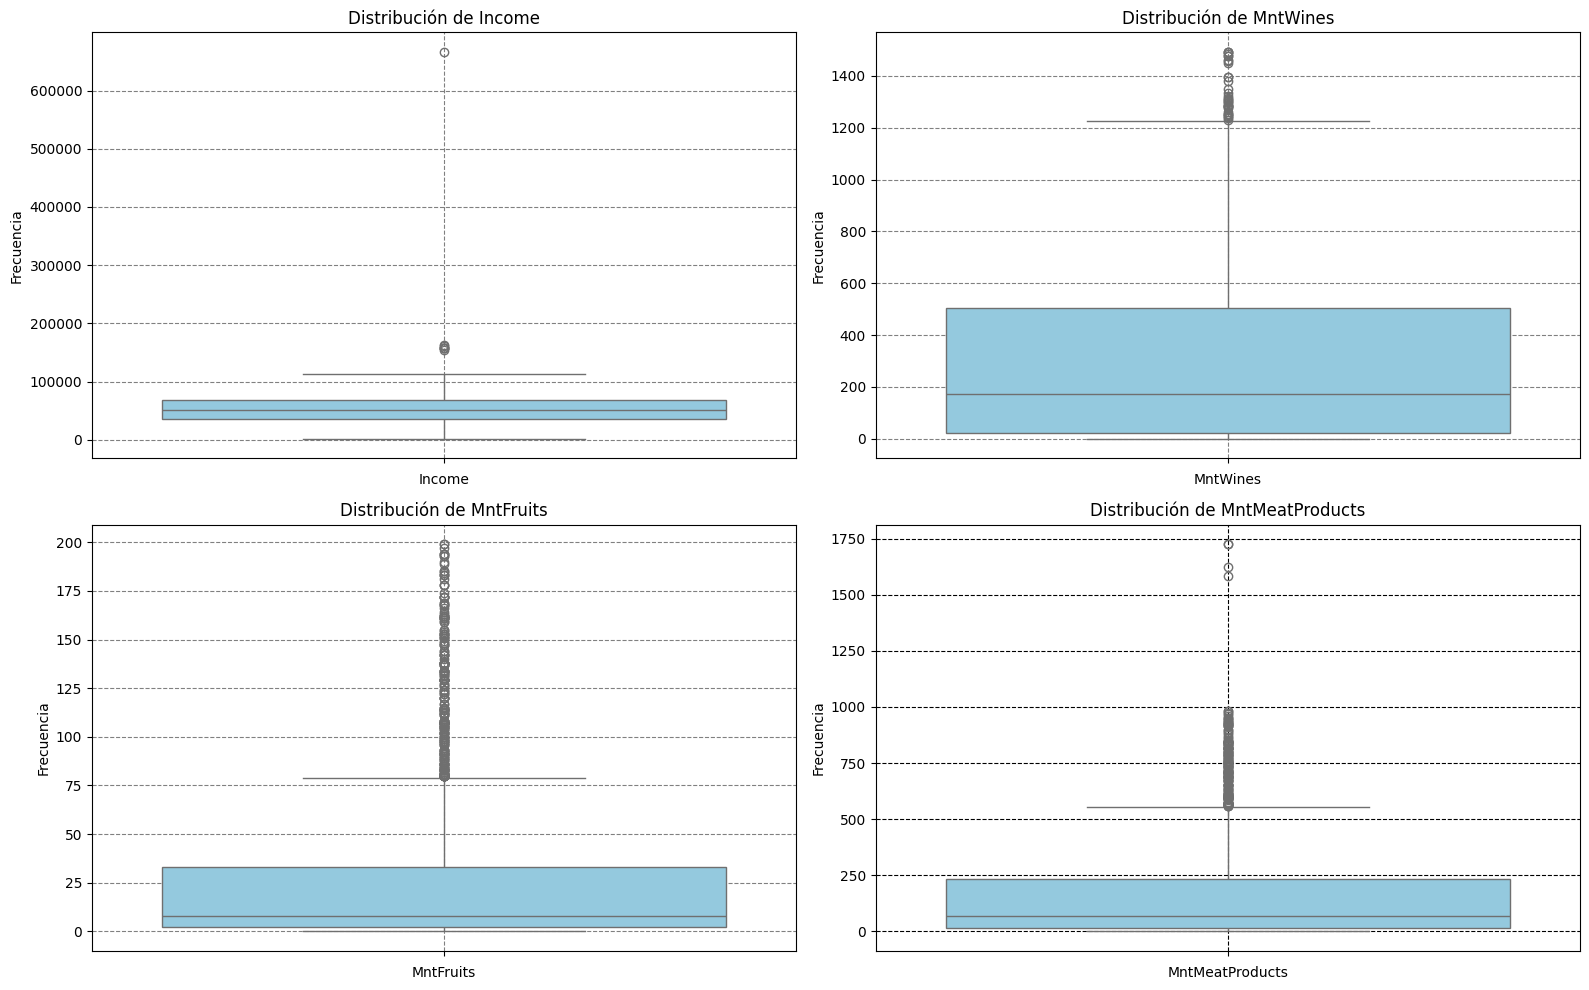

In [17]:
# Creating boxplots to detect outliers in the dataset
fig, axs = plt.subplots(2, 2, figsize =(16, 10))

sns.boxplot(df['Income'], color = 'skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Income')
axs[0, 0].set_xlabel('Income')
axs[0,0].set_ylabel('Frecuencia')
axs[0, 0].grid(True, linestyle = '--', color = 'gray')

sns.boxplot(df['MntWines'], color = 'skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Distribución de MntWines')
axs[0, 1].set_xlabel('MntWines')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].grid(True, linestyle = '--', color = 'gray')

sns.boxplot(df['MntFruits'], color = 'skyblue', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de MntFruits')
axs[1, 0].set_xlabel('MntFruits')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].grid(True, linestyle = '--', color = 'gray')

sns.boxplot(df['MntMeatProducts'], color = 'skyblue', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de MntMeatProducts')
axs[1, 1].set_xlabel('MntMeatProducts')
axs[1,1].set_ylabel('Frecuencia')
axs[1, 1].grid(True, linestyle = '--', color = 'black')

plt.tight_layout()
plt.show()

In [18]:
#Veo unos outliers en estos gráficos. Los que son muy diferentes los eliminaré.
import plotly.express as px

fig = px.box(df, y = 'Income', title='Distribución de Income')
fig.show()


In [19]:
df = df[df['Income'] <= 162397]
fig = px.box(df, y = 'Income', title='Distribución de Income')
fig.show()

In [20]:
# Visualizing 'MntMeatProducts' column using a boxplot
fig = px.box(df, y = 'MntMeatProducts', title='Distribución de MntMeatProducts')
fig.show()

In [21]:
df = df[df['MntMeatProducts'] <= 984]
fig = px.box(df, y = 'MntSweetProducts', title='Distribución de MntSweetProducts')
fig.show()

In [22]:
df = df[df['MntSweetProducts'] <= 198]
fig = px.box(df, y = 'MntGoldProds', title='Distribución de MntGoldProds')
fig.show()

In [23]:
df = df[df['MntGoldProds'] <= 249]
# Normalizing and encoding the data using a pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Splitting the target variable
y = df['Response']
X = df.drop('Response', axis=1)

df_numeric = X.select_dtypes(include=['int64', 'float64']).columns
df_cat = X.select_dtypes(include=['object']).columns

# Creating a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df_numeric),
        ('cat', OneHotEncoder(), df_cat)
    ])

# Applying transformations to the dataset
X_transformed = preprocessor.fit_transform(X) # Produces an array, so it must be converted back to a DataFrame

# Retrieving feature names
num_features = preprocessor.named_transformers_['num'].get_feature_names_out(df_numeric)
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(df_cat)

# Creating the new DataFrame
X = pd.DataFrame(X_transformed, columns=list(num_features) + list(cat_features))

print(X.head()) # Checking if everything is correctly processed

   Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.985108  0.296982 -0.824317 -0.930564  0.308803  0.974251   1.545086   
1   -1.235421 -0.262904  1.037779  0.909718 -0.383314 -0.874804  -0.638482   
2   -0.317607  0.936668 -0.824317 -0.930564 -0.798584  0.354936   0.566246   
3    1.267707 -1.198008  1.037779 -0.930564 -0.798584 -0.874804  -0.563186   
4    1.017394  0.304340  1.037779 -0.930564  1.554613 -0.394761   0.415655   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Basic  \
0         1.771212         2.448983          1.494285  ...              0.0   
1        -0.736668        -0.652671         -0.637352  ...              0.0   
2        -0.174717         1.336037         -0.147320  ...              0.0   
3        -0.671649        -0.506711         -0.588349  ...              0.0   
4        -0.216515         0.150110         -0.000311  ...              0.0   

   Education_Graduation  Education_Master  Education_PhD

In [24]:
# All good....

# No supervised analysis

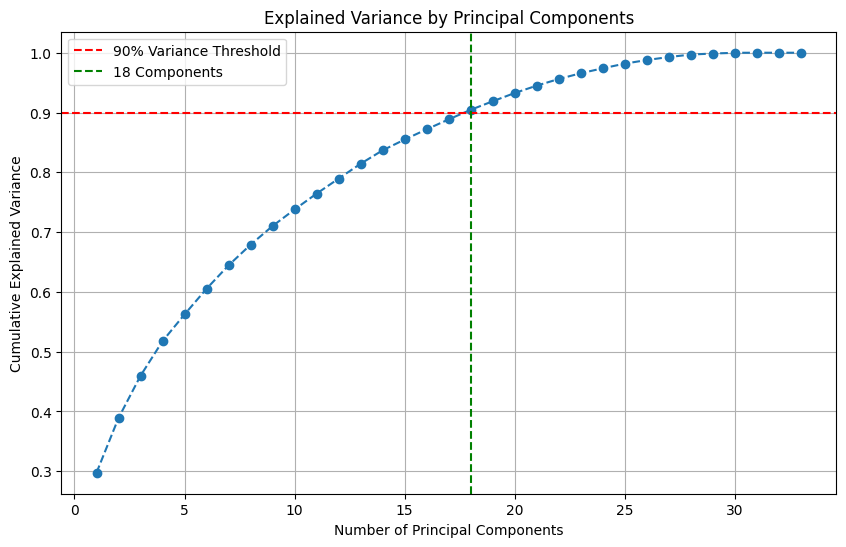

Number of components needed to explain 90% of the variance: 18
First rows of the training set transformed with PCA:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.284184 -1.593248  0.202734  0.178951 -0.469372 -0.118555 -0.062683   
1  1.415587  0.628104 -0.386980 -0.704201  0.041114 -1.523426  0.147748   
2 -1.916450  1.134381 -0.397519 -0.487809  0.095603  0.141251 -0.085133   
3 -3.780002 -1.109366  0.601930  0.231954  0.676458 -0.690996 -0.419800   
4  1.306501 -0.569312 -0.089922 -1.743733 -0.379834  1.047203 -0.129030   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.160243 -0.403150 -0.125523  0.101181  0.037831 -0.199742 -0.033216   
1 -0.772844 -1.080820 -0.258177 -0.580826  1.355688 -0.544260 -0.017698   
2  1.178239  0.661736 -0.303681 -0.572947 -0.759669  0.328023  0.071382   
3 -0.335809  1.203458  2.896397 -0.392571  0.079028  0.767662  0.999824   
4 -0.509846 -0.660479  0.209861 -0.226595 -0.819664 -0.856

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# THEORY NOTE: The following methodology is derived from the Bootcamp's dimensionality reduction module.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying PCA without specifying the number of components initially
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Determining the number of components needed to explain 90% of the variance
components_needed = (explained_variance_ratio >= 0.90).argmax() + 1

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
plt.axvline(x=components_needed, color='g', linestyle='--', label=f'{components_needed} Components')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of components needed to explain 90% of the variance: {components_needed}")

# Applying PCA with the required number of components
pca = PCA(n_components=components_needed)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Creating DataFrames for principal components
X_train_pca_df = pd.DataFrame(X_train_reduced, columns=[f'PC{i+1}' for i in range(components_needed)])
X_test_pca_df = pd.DataFrame(X_test_reduced, columns=[f'PC{i+1}' for i in range(components_needed)])

print("First rows of the training set transformed with PCA:")
print(X_train_pca_df.head())

In [26]:
# Insights from the plot:
# - To explain 90% of the variance, 18 components are required.
# - The red horizontal line represents the 90% variance threshold.
# - The green vertical line indicates the number of components (18) needed to reach that threshold.
# - Each row in `X_train_pca_df` represents an observation transformed into the new space of principal components.
# - Columns PC1 to PC18 represent linear combinations of the original variables.

# Example interpretations of PCA-transformed data:
# - Row 0 has negative values for PC1 and PC2, indicating it is influenced primarily by these two components.
# - Row 3 shows a high value for PC11, suggesting that this component plays a significant role in this observation.

# Reducing the dimensionality simplifies the model and lowers the risk of overfitting.

# MLP Model Creation

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# NOTE: Theoretical knowledge for this implementation comes from the Bootcamp module on MLP,
# combined with insights on using Dropout and Dense layers.

# Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reduced.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reduced, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_reduced, y_test)
print(f'Test accuracy: {test_acc:.4f}')

/Users/mathiorti/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



Epoch 1/100


/Users/mathiorti/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6844 - loss: 0.5868 - val_accuracy: 0.8839 - val_loss: 0.3470
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8567 - loss: 0.3749 - val_accuracy: 0.8867 - val_loss: 0.3004
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8743 - loss: 0.3041 - val_accuracy: 0.8810 - val_loss: 0.2866
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8588 - loss: 0.3314 - val_accuracy: 0.8924 - val_loss: 0.2813
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8963 - loss: 0.2786 - val_accuracy: 0.8839 - val_loss: 0.2748
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.2817 - val_accuracy: 0.8867 - val_loss: 0.2673
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.2494 - val_accuracy: 0.8924 - val_loss: 0.2649
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8988 - loss: 0.2565 - val_accuracy: 0.8782 - val_loss: 0.2

# Model Evaluation

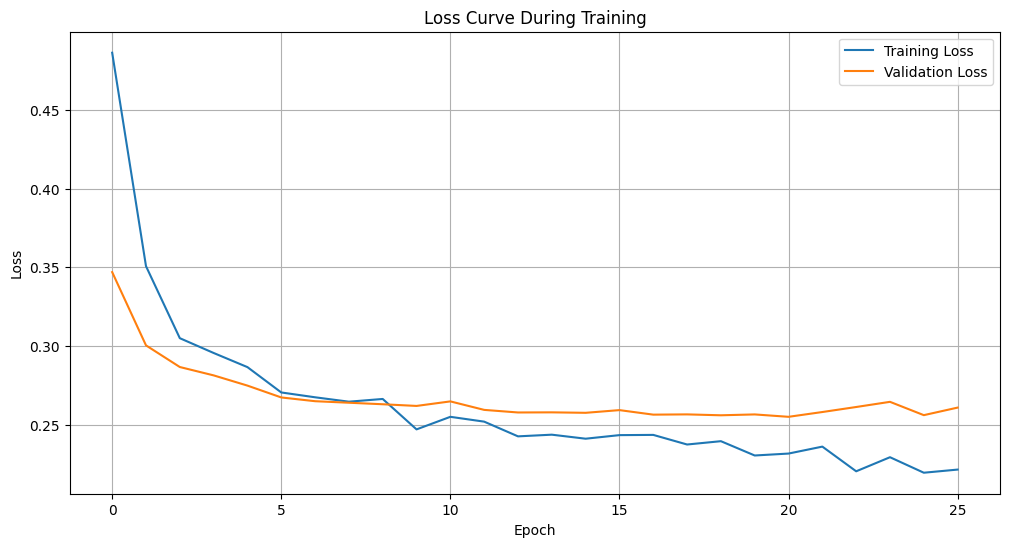

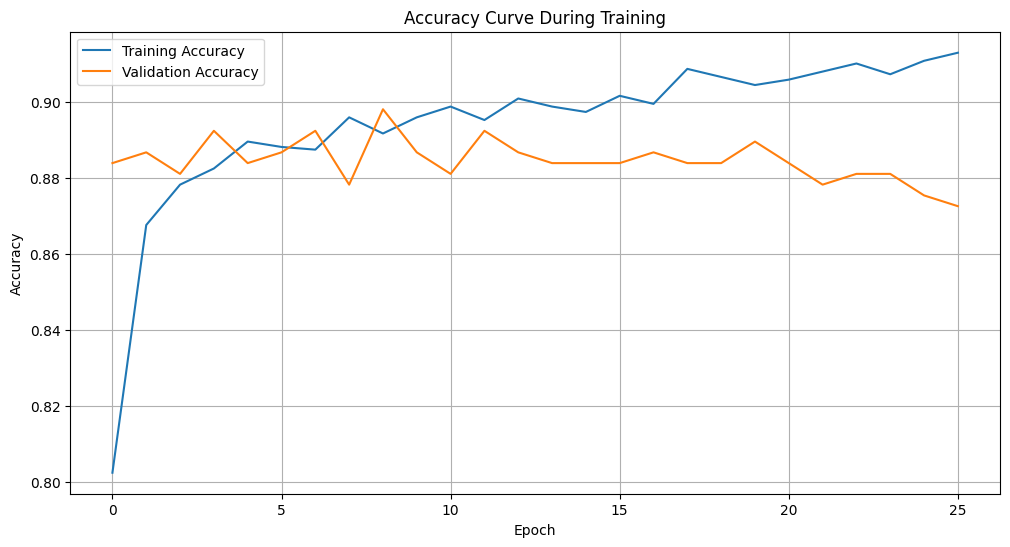

In [28]:
import matplotlib.pyplot as plt
# Plot the loss curve for training and validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy curve for training and validation
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


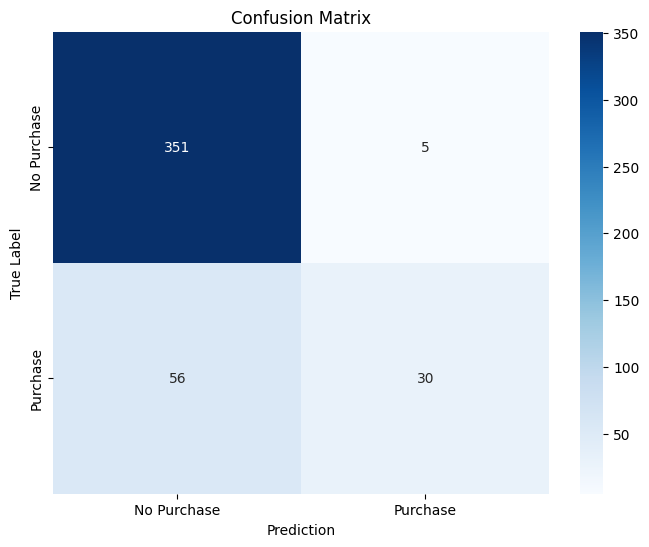

Classification Report:
              precision    recall  f1-score   support

 No Purchase       0.86      0.99      0.92       356
    Purchase       0.86      0.35      0.50        86

    accuracy                           0.86       442
   macro avg       0.86      0.67      0.71       442
weighted avg       0.86      0.86      0.84       442



In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
y_pred_prob = model.predict(X_test_reduced)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase'])
print("Classification Report:")
print(report)

# Reflection and Analysis

### Learning Insights
- Observing the **loss curve**, I can conclude that the loss decreases steadily, indicating that the model is learning effectively.
- The validation loss also decreases and then stabilizes in the later epochs, showing that the model is not overfitting.
- The **accuracy curve** shows that the training accuracy reaches approximately 90%, while the validation accuracy stabilizes near 89%, indicating good performance on unseen data.

### Confusion Matrix Insights
- **True Negatives (TN):** 351
- **False Positives (FP):** 5
- **False Negatives (FN):** 56
- **True Positives (TP):** 30

### Classification Report Analysis
- There is a significantly larger number of customers who did not make purchases (356) compared to those who did (86). This explains the low recall for the 'Purchase' class.
- Suggestions for improvement:
  - Collect more data on customers who made purchases.
  - Adjust the decision threshold to improve the recall for the 'Purchase' class.

---

# Insights from Unsupervised Analysis

- **PCA Implementation:**
  - PCA was applied to reduce dimensionality and obtain the principal components capturing 90% of the variance.
  - This helped simplify the dataset without losing significant information, making the MLP training process more efficient and reducing overfitting risk.

- **Key Variables Identified:**
  - Variables such as `MntWines`, `MntMeatProducts`, and `Income` were influential in the principal components, indicating their importance in defining customer purchasing behavior.

- **Practical Applications:**
  - These insights can help tailor marketing campaigns and understand key characteristics of customers with a higher likelihood of making purchases.

---

# Performance of the MLP Model

- **Overall Performance:**
  - The MLP model demonstrated good overall accuracy on the test dataset and performed well in predicting customer purchases.

- **Benefits of PCA:**
  - The MLP benefited from the dimensionality reduction through PCA, which simplified the dataset while retaining critical patterns.

- **Challenges:**
  - Class imbalance negatively impacted the recall for the 'Purchase' class.

---

# How to Improve the Model

1. **Address Class Imbalance:**
   - Use techniques such as oversampling the minority class or undersampling the majority class.
   - Experiment with Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset.

2. **Tune Model Parameters:**
   - Experiment with the number of neurons, hidden layers, learning rates, and activation functions to optimize the model's performance.

---

# Target Variable Analysis

- The `Response` column was used as the target variable:
  - `1`: The customer accepted an offer and made a purchase.
  - `0`: The customer did not accept an offer or make a purchase.
- The MLP model is designed to predict whether a customer will make a future purchase based on their features in the dataset.

---

# Conclusion

- **PCA Impact:**
  - PCA was effective in simplifying the model and providing a better understanding of customer behavior patterns.
  
- **MLP Performance:**
  - The MLP model showed good overall performance in predicting customer purchases.

- **Future Improvements:**
  - The most impactful improvement would be addressing class imbalance to enhance the recall for the 'Purchase' class.
